<a href="https://colab.research.google.com/github/SimonKato/CAP4621/blob/master/CAP4621_Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import glob
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load in data from our CycleGAN

# mount drive : files are in /content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# need to generate:
# train_images, test_images : [[img1],[img2]] <numpy.array <numpy.array>> (n,(256,512,3))
# train_labels, test_labels: [[label],[label]] (n,1)

In [3]:
# (real_unmasked, fake_masked) and (fake_unmasked,real_masked)
fake_masked = glob.glob('/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/*fake_B.png')
# real_masked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*real_B.png')
# fake_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*fake_A.png')
real_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/*real_A.png')
print("Fake Masked ", fake_masked)
# print("Real Masked ",real_masked)
# print("Fake Unmasked",fake_unmasked)
print("Real Unmasked",real_unmasked)

Fake Masked  ['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenderong_0009_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenxuedong_0017_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dengziqi_0067_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dongxuan_0206_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_duhaitao_0164_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanganna_0085_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0072_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0078_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_

In [4]:
# slice out fake_masked[len(fake_masked)/2:]
halfway = int(len(fake_masked)/2)
correct = fake_masked[:halfway]
toShuffle = fake_masked[halfway:]
print(correct)
print(toShuffle)

['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenderong_0009_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenxuedong_0017_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dengziqi_0067_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dongxuan_0206_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_duhaitao_0164_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanganna_0085_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0072_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0078_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0

In [5]:
# shuffle toShuffle
random.shuffle(toShuffle)
print(toShuffle)
# concatenate correct and shuffled
fake_masked = correct + toShuffle
print( fake_masked)

['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_zhanghuiwen_0206_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_xujinglei_0008_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0039_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_ganwei_0001_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_zhanghuiwen_0040_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_dongjie_0001_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0026_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0105_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_chenxinyu_0015_fake_

In [6]:
labels = np.array([np.array([1]) for x in range(0,halfway)] + [np.array([0]) for x in range(halfway,len(fake_masked))])
print(labels)

imgs =[]
for i in range(0,len(fake_masked)):
  real = cv2.imread(real_unmasked[i])
  fake = cv2.imread(fake_masked[i])
  new_img = cv2.hconcat([real,fake])
  imgs.append(new_img)

imgs = np.array(imgs)

# print(type(imgs[0]))
# # print(imgs)
# for img in imgs2:
#   print(img.shape)
#   cv2_imshow(img)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs,labels,test_size=0.2)

In [10]:
# train_images.shape
# print(train_labels.shape)
train_labels

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [25]:
# # TODO: pandas dataframe of 
# imgs =[]
# for i in range(0,len(fake_masked)):
#   real = cv2.imread(fake_unmasked[i])
#   fake = cv2.imread(real_masked[i])
#   new_img = cv2.hconcat([real,fake])
#   imgs.append(new_img)

# print(type(imgs[0]))
# # print(imgs)
# for img in imgs:
#   print(img.shape)
#   cv2_imshow(img)

In [11]:
discriminator = models.Sequential()
# 32 filters, (3x3) kernel size, relu activation, input shape of (256,512,3)
discriminator.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,512,3))) 
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(64,activation='relu'))
discriminator.add(layers.Dense(2))

In [12]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 126, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 124, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 476160)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [13]:
# attempt to compile and train
discriminator.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

results = discriminator.fit(train_images,train_labels,epochs=5,validation_data =(test_images,test_labels)) #need to populate this data

Epoch 1/5
1/1 [==============================] - 0s 444ms/step - loss: 5.3365 - accuracy: 0.5625 - val_loss: 3212.7905 - val_accuracy: 0.6000
Epoch 2/5
1/1 [==============================] - 0s 308ms/step - loss: 4122.1665 - accuracy: 0.4375 - val_loss: 173.7910 - val_accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 298ms/step - loss: 197.0823 - accuracy: 0.4375 - val_loss: 1154.0398 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 0s 307ms/step - loss: 774.5442 - accuracy: 0.5625 - val_loss: 396.8180 - val_accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 302ms/step - loss: 270.1928 - accuracy: 0.5625 - val_loss: 67.3109 - val_accuracy: 0.4000


1/1 - 0s - loss: 67.3109 - accuracy: 0.4000


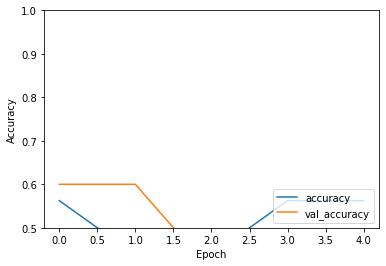

In [16]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = discriminator.evaluate(test_images,  test_labels, verbose=2)